# Breast Tumor Prediction using Random Forest, PCA and SVM

## Data Preprocessing and Cleaning

### Import Data and required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset information
The [Breast Cancer Wisconsin (Diagnostic) Data Set](https://goo.gl/U2Uwz2) is obtained from UCI Machine Learning Repository. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [2]:
columns = ['ID', 'Diagnosis', 'mean_Radius', 'mean_Texture', 'mean_Perimeter', 'mean_Area', 'mean_Smoothness', 'mean_Compactness',
           'mean_Concavity', 'mean_Concave_pts', 'mean_Symmetry', 'mean_Fractional_dim', 
           'se_Radius', 'se_Texture', 'se_Perimeter', 'se_Area', 'se_Smoothness', 'se_Compactness', 
           'se_Concavity', 'se_Concave_pts', 'se_Symmetry', 'se_Fractional_dim',
           'worst_Radius', 'worst_Texture', 'worst_Perimeter', 'worst_Area', 'worst_Smoothness',
           'worst_Compactness', 'worst_Concavity', 'worst_Concave_pts', 'worst_Symmetry', 'worst_Fractional_dim']

df=pd.read_csv('wdbc.data',names=columns,header=None)

In [3]:
df.head()

,ID,Diagnosis,mean_Radius,mean_Texture,mean_Perimeter,mean_Area,mean_Smoothness,mean_Compactness,mean_Concavity,mean_Concave_pts,...,worst_Radius,worst_Texture,worst_Perimeter,worst_Area,worst_Smoothness,worst_Compactness,worst_Concavity,worst_Concave_pts,worst_Symmetry,worst_Fractional_dim
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


### Organising the dataset

In [4]:
#Drop the 'ID' column since it's just an identifier and not useful for this project.
df.drop(['ID'],axis=1,inplace=True)
df['Target']=df['Diagnosis']
df.drop(['Diagnosis'],axis=1,inplace=True)

#Coverting label datatype from 'string' to 'int'
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
df["Target"]=label.fit_transform(df["Target"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_Radius           586 non-null    float64
 1   mean_Texture          586 non-null    float64
 2   mean_Perimeter        586 non-null    float64
 3   mean_Area             586 non-null    float64
 4   mean_Smoothness       586 non-null    float64
 5   mean_Compactness      586 non-null    float64
 6   mean_Concavity        586 non-null    float64
 7   mean_Concave_pts      586 non-null    float64
 8   mean_Symmetry         586 non-null    float64
 9   mean_Fractional_dim   586 non-null    float64
 10  se_Radius             586 non-null    float64
 11  se_Texture            586 non-null    float64
 12  se_Perimeter          586 non-null    float64
 13  se_Area               586 non-null    float64
 14  se_Smoothness         586 non-null    float64
 15  se_Compactness        5

### Clean (address missing values, correct inconsistencies, and remove duplicates to ensure the dataset is ready for analysis.).¶

In [5]:
#Checking null values in the dataframe
df.isna().sum()

mean_Radius             0
mean_Texture            0
mean_Perimeter          0
mean_Area               0
mean_Smoothness         0
mean_Compactness        0
mean_Concavity          0
mean_Concave_pts        0
mean_Symmetry           0
mean_Fractional_dim     0
se_Radius               0
se_Texture              0
se_Perimeter            0
se_Area                 0
se_Smoothness           0
se_Compactness          0
se_Concavity            0
se_Concave_pts          0
se_Symmetry             0
se_Fractional_dim       0
worst_Radius            0
worst_Texture           0
worst_Perimeter         0
worst_Area              0
worst_Smoothness        0
worst_Compactness       0
worst_Concavity         0
worst_Concave_pts       0
worst_Symmetry          0
worst_Fractional_dim    0
Target                  0
dtype: int64

In [6]:
#Checking the duplicate rows in dataframe.
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

     mean_Radius  mean_Texture  mean_Perimeter  mean_Area  mean_Smoothness  \
3         19.690         21.25          130.00     1203.0          0.10960   
7         12.450         15.70           82.57      477.1          0.12780   
21        19.810         22.15          130.00     1260.0          0.09831   
35        11.840         18.70           77.93      440.6          0.11090   
49        13.170         21.81           85.42      531.5          0.09714   
89        19.100         26.29          129.10     1132.0          0.12150   
107       13.610         24.98           88.05      582.7          0.09488   
132       13.370         16.39           86.10      553.5          0.07115   
170       19.190         15.94          126.30     1157.0          0.08694   
200       14.220         23.12           94.37      609.9          0.10750   
211       12.230         19.56           78.54      461.0          0.09586   
234       10.180         17.53           65.12      313.1       

In [7]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

## Data exploration and summary statistics

In [9]:
#Summary Statistics
df.describe()

,mean_Radius,mean_Texture,mean_Perimeter,mean_Area,mean_Smoothness,mean_Compactness,mean_Concavity,mean_Concave_pts,mean_Symmetry,mean_Fractional_dim,...,worst_Texture,worst_Perimeter,worst_Area,worst_Smoothness,worst_Compactness,worst_Concavity,worst_Concave_pts,worst_Symmetry,worst_Fractional_dim,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Count plot of each diagnosis

In [13]:
count=df['Target'].value_counts()

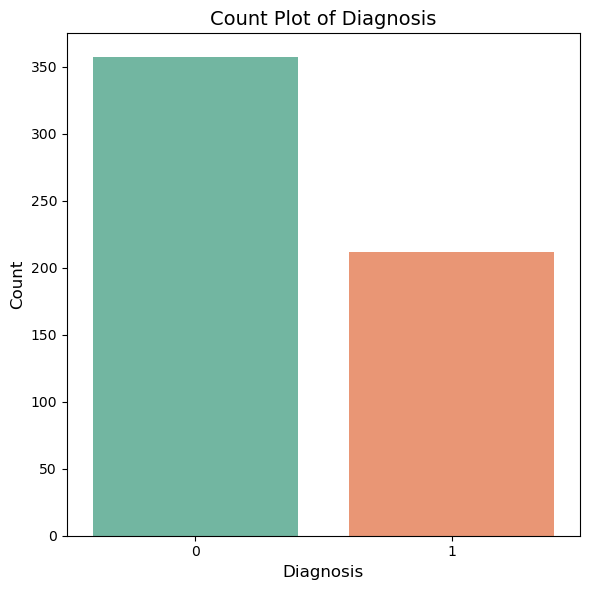

In [41]:
plt.figure(figsize=(6, 6))

sns.countplot(x=df['Target'], palette="Set2")
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count Plot of Diagnosis", fontsize=14)
plt.tight_layout()
plt.show()

### The dataset includes 30 features (e.g., mean radius, mean texture, mean area, etc.) with no missing values. Each feature is a continuous variable measured for tumors labeled as benign (0) or malignant (1).

## 1. T-Test to get the important features in the given dataset

In [15]:
from scipy import stats
features = df.iloc[:,:-1]

p_values = {}
t_statistics={}

for feature in features:
    malignant = df[df['Target'] == 1][feature]
    benign = df[df['Target'] == 0][feature]
    
    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(malignant, benign)
    
    # Store the results
    p_values[feature] = p_value
    t_statistics[feature] = t_stat

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    't-statistic': t_statistics,
    'p-value': p_values
})

# Add significance based on p-value
results_df['significant'] = results_df['p-value'] < 0.05

# Sort and display the results
print(results_df.sort_values(by='p-value'))

                      t-statistic        p-value  significant
worst_Concave_pts       31.054555  1.969100e-124         True
worst_Perimeter         29.965717  5.771397e-119         True
mean_Concave_pts        29.354319  7.101150e-116         True
worst_Radius            29.339082  8.482292e-116         True
mean_Perimeter          26.405213  8.436251e-101         True
worst_Area              25.721590   2.828848e-97         True
mean_Radius             25.435822   8.465941e-96         True
mean_Area               23.938687   4.734564e-88         True
mean_Concavity          23.103963   9.966556e-84         True
worst_Concavity         20.897175   2.464664e-72         True
mean_Compactness        17.698392   3.938263e-56         True
worst_Compactness       17.445374   7.069816e-55         True
se_Radius               16.396351   9.738949e-50         True
se_Perimeter            15.934158   1.651905e-47         True
se_Area                 15.609343   5.895521e-46         True
worst_Te

A p-value threshold (set at 0.05 above) is used to determine significance.Here, for all features except those listed at the bottom (e.g., fractal dimension error, smoothness error) the p value is less than 0.05, and the result is considered statistically significant, leading to rejection of the null hypothesis. So, all these features are important, indicating that there is a meaningful difference in their means between malignant and benign groups.

### Barplot to show correlation of the variables with target variable

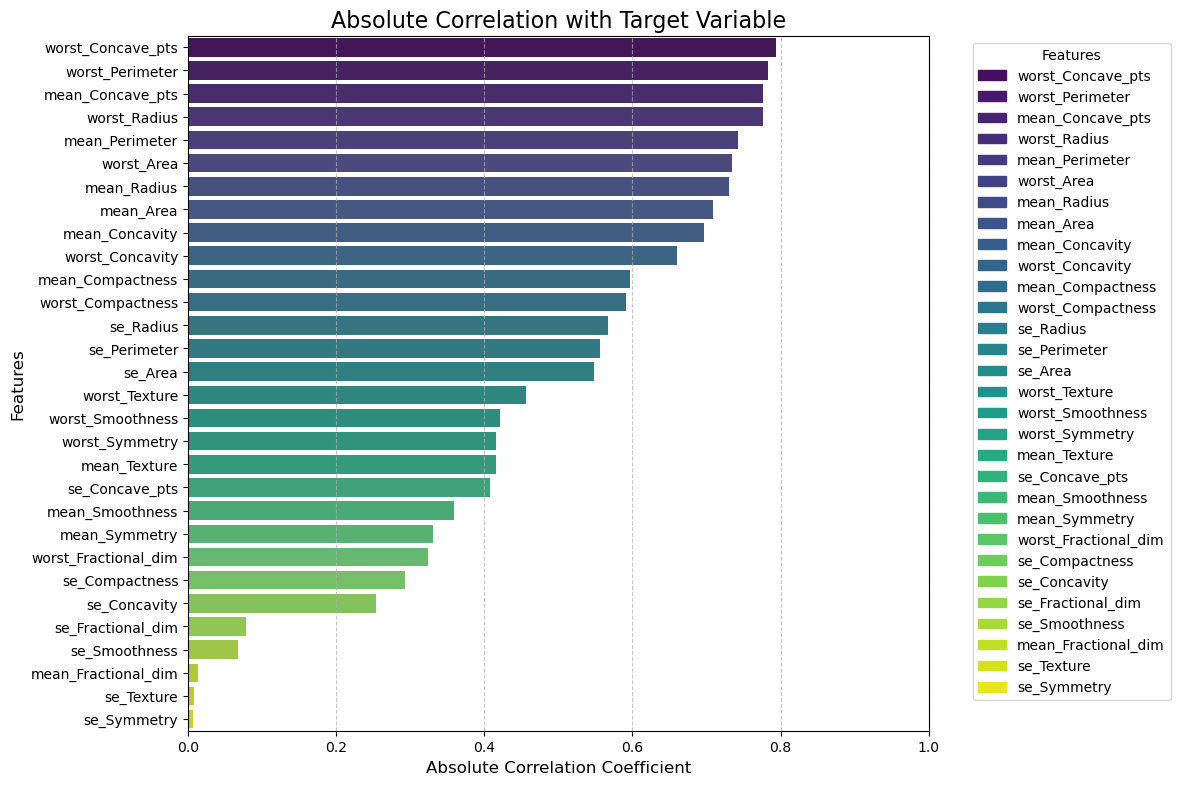

In [30]:
import matplotlib.patches as mpatches

# Compute absolute correlation of features with the target
correlation = df.corr()['Target'].drop('Target').abs().sort_values(ascending=False)

# Increase figure size
plt.figure(figsize=(12, 8))

# Create manual legend
colors = sns.color_palette('viridis', len(correlation))
patches = [mpatches.Patch(color=colors[i], label=feature) for i, feature in enumerate(correlation.index)]
plt.legend(handles=patches, title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create bar plot
sns.barplot(y=correlation.index, x=correlation.values, palette='viridis')
plt.title('Absolute Correlation with Target Variable', fontsize=16)
plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xlim(0, 1)  # Ensure the x-axis is limited to [0, 1] for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines to x-axis for better readability

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## 2. Anova:

In [18]:
features = df.iloc[:,:-1]

anova_results = {}

for feature in features:
    groups = [group[feature].values for name, group in df.groupby('Target')]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = (f_stat, p_value)

# Create a DataFrame to summarize ANOVA results
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
anova_df['significant'] = anova_df['p-value'] < 0.05

# Display results
print(anova_df.sort_values(by='p-value'))

                      F-statistic        p-value  significant
worst_Concave_pts      964.385393  1.969100e-124         True
worst_Perimeter        897.944219  5.771397e-119         True
mean_Concave_pts       861.676020  7.101150e-116         True
worst_Radius           860.781707  8.482292e-116         True
mean_Perimeter         697.235272  8.436251e-101         True
worst_Area             661.600206   2.828848e-97         True
mean_Radius            646.981021   8.465941e-96         True
mean_Area              573.060747   4.734564e-88         True
mean_Concavity         533.793126   9.966556e-84         True
worst_Concavity        436.691939   2.464664e-72         True
mean_Compactness       313.233079   3.938263e-56         True
worst_Compactness      304.341063   7.069816e-55         True
se_Radius              268.840327   9.738949e-50         True
se_Perimeter           253.897392   1.651905e-47         True
se_Area                243.651586   5.895521e-46         True
worst_Te

## Box Plot

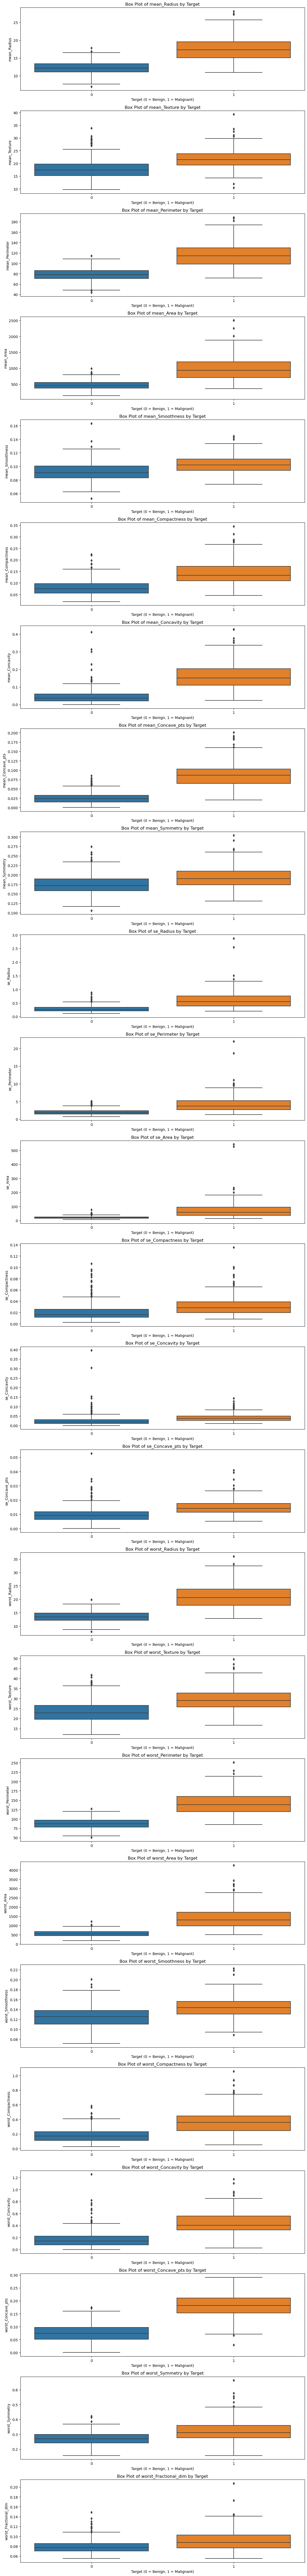

In [19]:
significant_features = anova_df[anova_df['significant']].index

# Set up the plot size
plt.figure(figsize=(12, len(significant_features) * 4))

# Create a box plot for each significant feature
for i, feature in enumerate(significant_features):
    plt.subplot(len(significant_features), 1, i + 1)
    sns.boxplot(x='Target', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Target')
    plt.xlabel('Target (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust the layout
plt.show()

Looking at the above box plot, there are outliers all the significant parameters, for both tumor and non-tumor types. The box plot generated for all the significant features visually demonstrates the difference in distributions. The plots shows that malignant tumors have a higher mean compared to benign tumors.

## 3. Chi-Squared Test of Independence

### Objective
Examine the relationship between two categorical variables. For example, you could analyze the relationship between tumor type (benign or malignant) and a categorical feature such as whether the tumor is classified as "high" or "low" based on the mean smoothness threshold.

### Hypothesis
- **Null Hypothesis (H0):** There is no association between tumor type and the categorical feature (e.g., high or low mean smoothness).
- **Alternative Hypothesis (H1):**  There is a significant association between tumor type and the categorical feature.

In [20]:
chi_squared_results = {}

# Perform Chi-squared test for categorical features
for feature in features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Target'])
    
    # Perform the Chi-squared test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    chi_squared_results[feature] = (chi2_stat, p_value)

# Create a DataFrame to summarize Chi-squared results
chi_squared_df = pd.DataFrame.from_dict(chi_squared_results, orient='index', columns=['Chi-squared Statistic', 'p-value'])
chi_squared_df['significant'] = chi_squared_df['p-value'] < 0.05

# Display results
print(chi_squared_df.sort_values(by='p-value'))

                      Chi-squared Statistic   p-value  significant
worst_Radius                     537.629468  0.004962         True
mean_Radius                      513.745086  0.029296         True
worst_Concave_pts                546.185068  0.042703         True
mean_Perimeter                   553.314734  0.158257        False
se_Area                          552.601767  0.212835        False
se_Perimeter                     556.166601  0.226535        False
worst_Perimeter                  536.203535  0.231322        False
worst_Smoothness                 429.615023  0.242729        False
mean_Concavity                   558.305501  0.244365        False
se_Concavity                     554.027701  0.246177        False
mean_Texture                     498.416303  0.250593        False
mean_Concave_pts                 562.583300  0.252122        False
worst_Compactness                548.323968  0.261727        False
se_Radius                        557.592534  0.280909        F

Since the p-value is significantly lower than 0.05, we reject the null hypothesis (H0). This implies that there is a significant association between tumor type (benign vs. malignant) and the smoothness category (high vs. low).

Chi2 Stat: 463.33834496062576, p-value: 0.6158417342512038


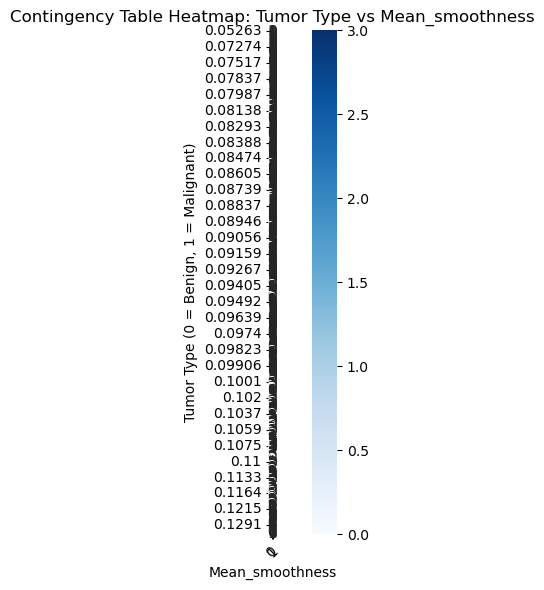

In [21]:
feature_name='mean_Smoothness'
contingency_table = pd.crosstab(df[feature_name], df['Target'])

# Perform the Chi-squared test
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Print Chi-squared statistic and p-value
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value_chi2}")

# Create the heatmap for the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', 
            cbar=True, linewidths=0.5, linecolor='gray', square=True)

plt.title(f'Contingency Table Heatmap: Tumor Type vs {feature_name.capitalize()}')
plt.ylabel('Tumor Type (0 = Benign, 1 = Malignant)')
plt.xlabel(f'{feature_name.capitalize()}')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

The plot shows the count of benign and malignant tumors within each smoothness category (low and high).
Each bar represents a tumor type, with segments indicating the number of tumors classified as "Low" or "High" based on mean smoothness.

## Correlation

As discussed above, some dependent variables in the dataset might be highly correlated with each other. Let's explore the correlation.

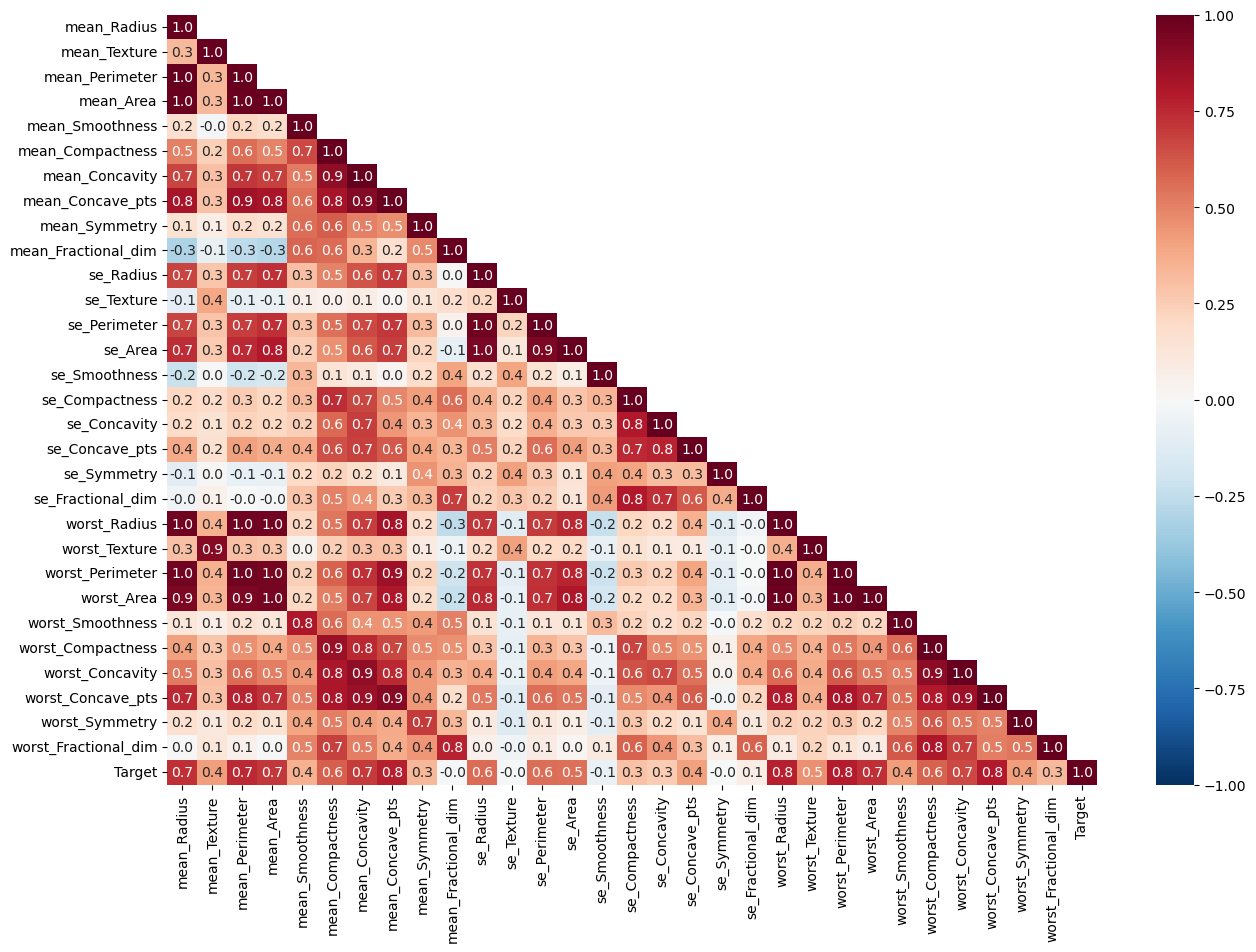

In [22]:
# Create correlation matrix
corr_matrix = df.corr()
#print("Correlation Matrix : ",corr_matrix)
# Create mask
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)
plt.show()

From the heat map, we can see that many variables in the dataset are highly correlated. What are variables having correlation greater than 0.8?

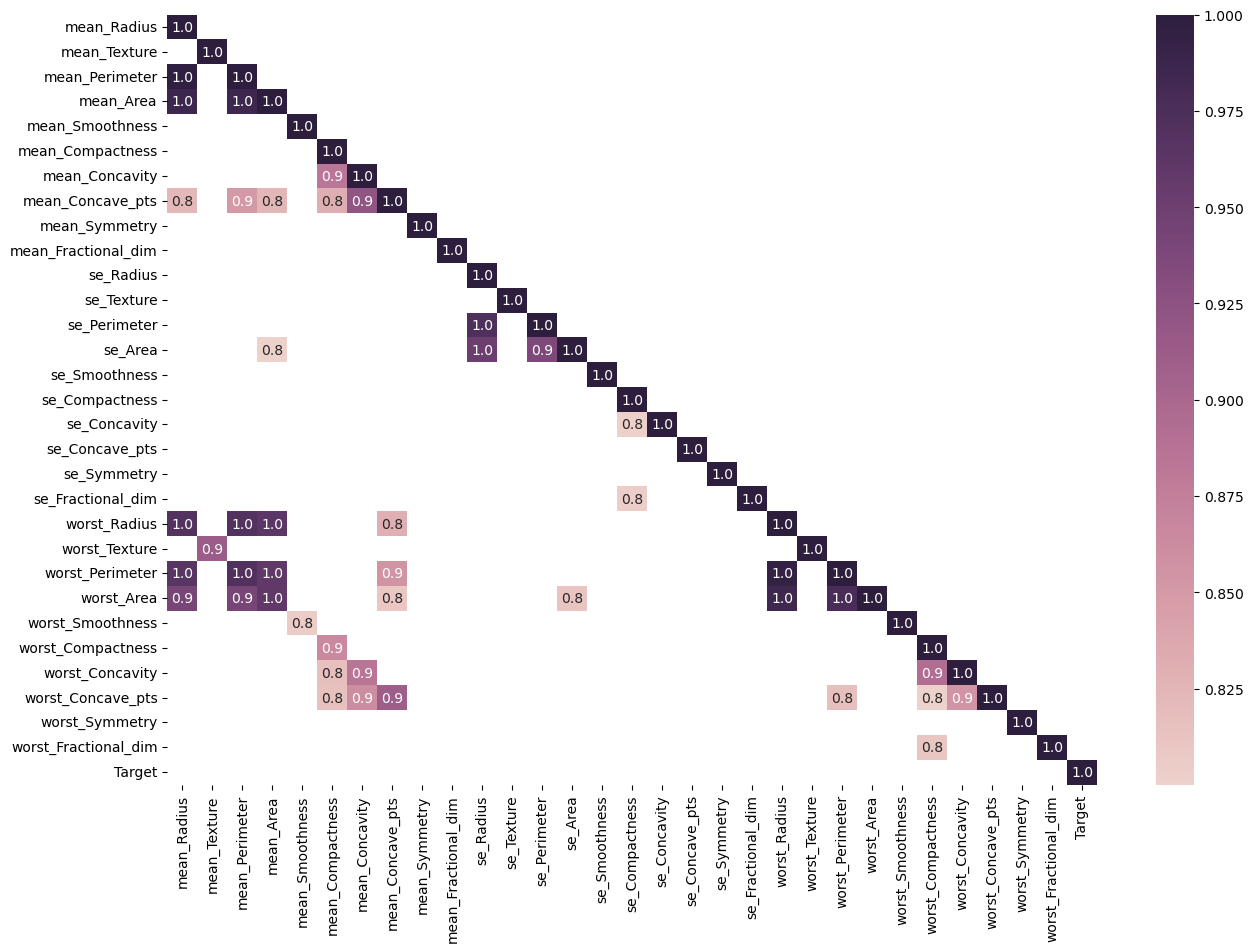

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[corr_matrix > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)
plt.show()

## Create a model

### Feature Selection

I will apply Univariate Feature Selection (sklearn.feature_selection.SelectKBest) to identify the top 5 features with the highest scores. The choice of 5 features is based on the heatmap, which highlighted roughly 5 clusters of highly correlated features.

In [48]:
from sklearn.feature_selection import SelectKBest, chi2

df_features = df.iloc[:, 2:]  # Features start from the 3rd column
df_target = df['Target']

feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['mean_Perimeter', 'mean_Area', 'se_Area', 'worst_Perimeter', 'worst_Area']


In [49]:
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

,mean_Perimeter,mean_Area,se_Area,worst_Perimeter,worst_Area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


### 1) Random Forest Classifier
### Model Training

In [54]:
#Train and Test Split
from sklearn.model_selection import train_test_split
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Creating and Training a Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Model Evaluation

In [55]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[117   4]
 [  4  63]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



The model achieves an accuracy of approximately 97%, making only 5 incorrect predictions out of 188. This demonstrates that the selected features are highly effective in identifying cancer.

## 2) PCA and SVM

#### Feature extraction using principal component analysis (PCA)

In [57]:
from sklearn.decomposition import PCA

Principal Component Analysis (PCA) reduces dimensionality by applying Singular Value Decomposition (SVD) to project the data into a lower-dimensional space.

PCA creates new features that capture the maximum variance in the data.

To enhance PCA performance, the data must be scaled so that all features have unit variance. This step was already completed during the EDA process.

In [59]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled, columns=df_features.columns)

X_scaled = features_scaled
X_scaled.head()

,mean_Perimeter,mean_Area,mean_Smoothness,mean_Compactness,mean_Concavity,mean_Concave_pts,mean_Symmetry,mean_Fractional_dim,se_Radius,se_Texture,...,worst_Texture,worst_Perimeter,worst_Area,worst_Smoothness,worst_Compactness,worst_Concavity,worst_Concave_pts,worst_Symmetry,worst_Fractional_dim,Target
0,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676
1,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676
2,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676
3,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676
4,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676


It's difficult to visualize high-dimensional data like our original data. I will use PCA to find the two principal components and visualize the data in this two-dimensional space.

In [60]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

/Users/rohitreddymandla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


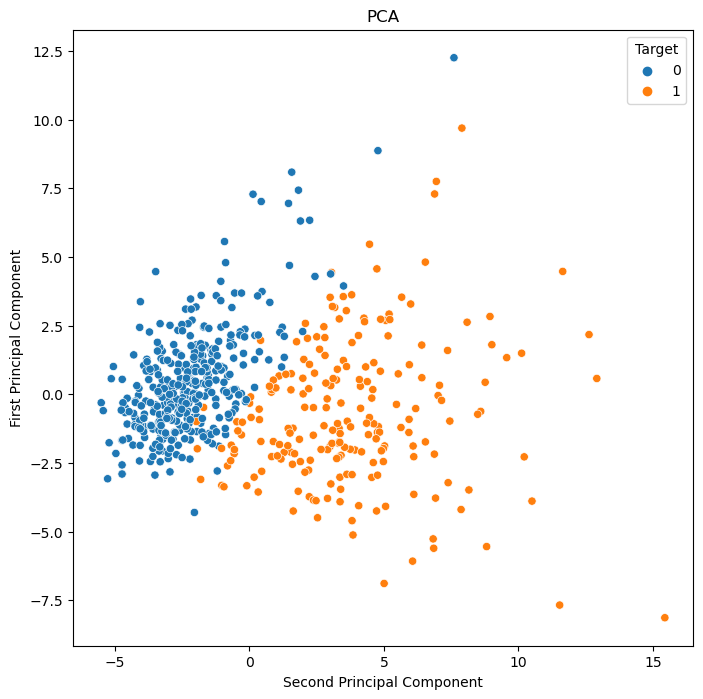

In [68]:
#Let's visualize our data based on these two principle components:
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=df['Target'])
plt.title("PCA")
plt.ylabel("First Principal Component")
plt.xlabel("Second Principal Component")
plt.show()

We can use the two principal components to clearly separace our data between Malignant and Benign.

### Model Training

In [76]:
#Train Test Split
X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Training a Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [77]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [79]:
#Model Prediction
y_pred = grid.predict(X_test)

### Model Evaluation

In [80]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[118   3]
 [  2  65]]


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



The model achieves a 95% accuracy rate making slightly more incorrect predictions compared to the Random Forest model. However, using PCA allows us to reduce the dimensionality of the data effectively.

## Conclusion

In the initial phase of this project, I conducted exploratory data analysis to gain insights into the 30 original features and their potential association with cancer.

Subsequently, I used univariate feature selection to identify the 5 most significant features and implemented a Random Forest classifier, achieving an accuracy of 97%.

Additionally, I applied PCA to extract two principal components and created a visualization, which demonstrated a clear separation between cancer and non-cancer cases using just these two variables. Finally, I employed a Support Vector Machine model to predict cancer based on the PCA-transformed data, achieving an accuracy of 95%.